In [ ]:
# plot 한글 깨짐 방지 코드
import matplotlib

matplotlib.rcParams['font.family'] ='Malgun Gothic'

matplotlib.rcParams['axes.unicode_minus'] =False

### 분류 알고리즘 선택

#### 1. 특성을 선택하고 훈련 샘플을 모은다.
#### 2. 성능 지표를 확인한다.
#### 3. 분류 모델과 최적화 알고리즘을 선택한다.
#### 4. 모델의 성능을 평가한다.
#### 5. 알고리즘을 튜닝한다.

### 사이킷런 퍼셉트론 훈련


In [1]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
X = iris.data[:,[2,3]]
y = iris.target
print('클래스 레이블:', np.unique(y))

# 0 : setosa 1 : versicolor 2 : virginica

클래스 레이블: [0 1 2]


In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

In [3]:
print('y의 레이블 카운트:', np.bincount(y))
print('y_train의 레이블 카운트:', np.bincount(y_train))
print('y_test의 레이블 카운트:', np.bincount(y_test))

y의 레이블 카운트: [50 50 50]
y_train의 레이블 카운트: [35 35 35]
y_test의 레이블 카운트: [15 15 15]


### 사이킷런 모듈을 이용해 데이터 표준화

#### fit() 매서드는 각 특성 차원마다 계산된 mu와 sigma를 사용하여 훈련 데이터셋을 표준화한다.

In [4]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [5]:
from sklearn.linear_model import Perceptron

ppn = Perceptron(eta0=0.1, random_state=1)
ppn.fit(X_train_std, y_train)

Perceptron(eta0=0.1, random_state=1)

In [7]:
y_pred = ppn.predict(X_test_std)
print('잘못 분류된 샘플의 개수: %d' % (y_test != y_pred).sum())

잘못 분류된 샘플의 개수: 1


In [8]:
from sklearn.metrics import accuracy_score
print('정확도: %.3f' % accuracy_score(y_test, y_pred))

정확도: 0.978


### 경계를 나타내는 그래프 그리기

In [10]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    
    # 마커와 컬러맵 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # 결정 경계를 그린다.
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=colors[idx],
                    marker=markers[idx],label=cl,
                    edgecolor='black')
    # 테스트 샘플을 부각하여 그린다.
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    facecolors='none', edgecolor='black', alpha=1.0,
                    linewidth=1, marker='o',
                    s=100, label='test set')


C:\Users\chang\AppData\Local\Temp/ipykernel_3624/641611377.py:24: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


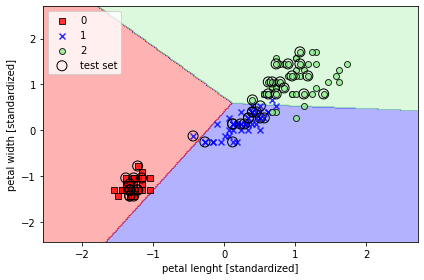

In [11]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plot_decision_regions(X=X_combined_std,
                      y=y_combined,
                     classifier=ppn,
                     test_idx=range(105,150))
plt.xlabel('petal lenght [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

### 퍼셉트론 마무리

#### 간단하고 좋은 모델이지만, 클래스가 선형적으로 구분되어 있지 않을 때 수렴할 수 없다.

#### 에포크마다 적어도 하나의 샘플이 잘못 분류되기 때문에 가중치 없데이트가 끝나지 않는다.

### 로지스틱 회귀 모델

#### 로지스틱 회귀는 이진 분류를 위한 선형 모델이다.
##### 다중 분류는 소프트맥스 회귀, 다항 로지스틱 회귀로 일반화해서 사용한다.

### odds ratio (오즈비): 특정 이벤트가 발생할 확률이다.
#### P가 양성 샘플일 확률일 때 P/(1-P)로 사용된다.
#### 오즈비에 로그 함수를 취해 logit 함수를 정의한다. logit(P) = log(P/(1-P))
#### logit(P) = w^T * x
#### P( y=1 | x ) --> x가 클래스 1에 속할 조건부 확률

### 어떤 샘플이 특정 클래스에 속할 확률을 예측하는 것은 logit 함수를 뒤집은 로지스틱 시그모이드 함수를 이용
#### phi(z) = 1/(1+e^(-z)) 이때 z는 가중치와 입력의 선형조합 = w^T * x

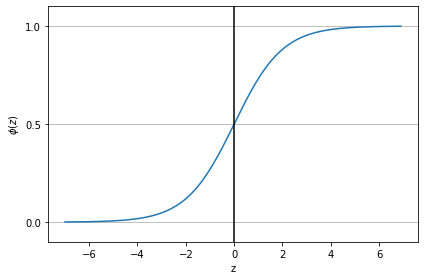

In [16]:
import matplotlib.pyplot as plt
import numpy as np

def sigmoid(z):
    return 1.0/(1.0+ np.exp(-z))

z = np.arange(-7, 7, 0.1)
phi_z = sigmoid(z)
plt.plot(z, phi_z)
plt.axvline(0.0, color='k')
plt.ylim(-0.1, 1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$') # $$ 기호를 이용하여 그리스 문자 표현 가능
# y축의 눈금과 격자선
plt.yticks([0.0, 0.5, 1.0])
ax = plt.gca()
ax.yaxis.grid(True)
plt.tight_layout()
plt.show()

### 아달린과 로지스틱 회귀의 차이점
#### 로지스틱 회귀는 입력 벡터가 특정 클래스에 속할 확률을 출력해준다.
#### 예를 들어 phi(z) = 0.8이라면 이 샘플은 80%의 확률로 특정 클래스에 속하는 것이다.

### 로지스틱 비용 함수의 가중치 학습

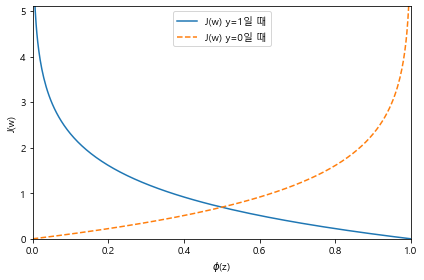

In [23]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

z = np.arange(-10, 10, 0.1)
phi_z = sigmoid(z)
c1 = [cost_1(x) for x in z]
plt.plot(phi_z, c1, label='J(w) y=1일 때')
c0 = [cost_0(x) for x in z]
plt.plot(phi_z, c0, linestyle='--', label='J(w) y=0일 때')
plt.ylim(0.0, 5.1)
plt.xlim([0, 1])
plt.xlabel('$\phi$(z)')
plt.ylabel('J(w)')
plt.legend(loc='best')
plt.tight_layout()
plt.show()